In [1]:
cd ..

/Users/shuai/Marshal/Mine/analysis/CS231n/assignment2


In [2]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.multi_cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [19]:
num_train = 100
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

filter_times = 4
model = MultiLayersCNN(num_filters=[32,]*filter_times, 
                       filter_sizes=[3,]*filter_times, 
                       hidden_dims=[500, 200], 
                       reg=0.001, weight_scale=5e-2)

solver = Solver(model, small_data,
                num_epochs=10, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 20) loss: 4.819705
(Epoch 0 / 10) train acc: 0.200000; val_acc: 0.087000
(Iteration 2 / 20) loss: 4.370957
(Epoch 1 / 10) train acc: 0.190000; val_acc: 0.102000
(Iteration 3 / 20) loss: 4.029868
(Iteration 4 / 20) loss: 3.567899
(Epoch 2 / 10) train acc: 0.370000; val_acc: 0.122000
(Iteration 5 / 20) loss: 3.191810
(Iteration 6 / 20) loss: 3.131648
(Epoch 3 / 10) train acc: 0.560000; val_acc: 0.128000
(Iteration 7 / 20) loss: 2.839228
(Iteration 8 / 20) loss: 2.925328
(Epoch 4 / 10) train acc: 0.700000; val_acc: 0.158000
(Iteration 9 / 20) loss: 2.580078
(Iteration 10 / 20) loss: 2.246305
(Epoch 5 / 10) train acc: 0.780000; val_acc: 0.171000
(Iteration 11 / 20) loss: 2.284289
(Iteration 12 / 20) loss: 2.404982
(Epoch 6 / 10) train acc: 0.860000; val_acc: 0.168000
(Iteration 13 / 20) loss: 2.228474
(Iteration 14 / 20) loss: 2.019189
(Epoch 7 / 10) train acc: 0.940000; val_acc: 0.172000
(Iteration 15 / 20) loss: 1.999624
(Iteration 16 / 20) loss: 1.710674
(Epoch 8 / 10) tr

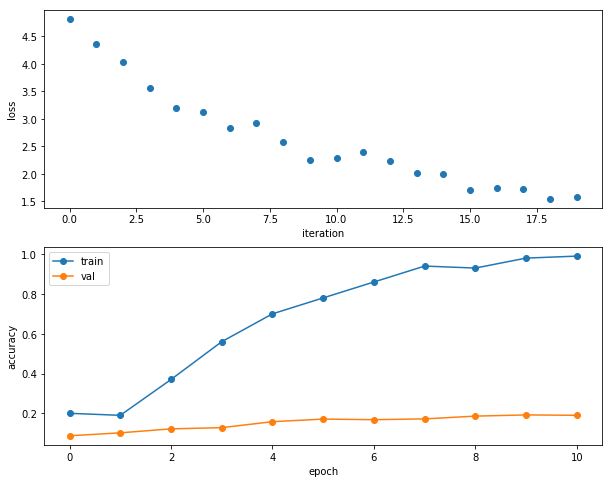

In [20]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()